<a href="https://colab.research.google.com/github/danunter/hw/blob/main/hw3_fashion_clsifc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a code that does the following: import "MNIST fashion" from TensorFlow. elaborate all the categories and labels of the data, and the number of item in each.


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the category labels
category_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Display information about categories, labels, and number of items
print("Fashion MNIST Categories and Labels:")
print("------------------------------------")
for label, category in category_labels.items():
    num_items = sum(train_labels == label)
    print(f"Category {label} ({category}): {num_items} items in the training set.")

# Additional information about the dataset
print("\nAdditional Information:")
print("-----------------------")
print(f"Shape of training images: {train_images.shape}")
print(f"Shape of testing images: {test_images.shape}")


Fashion MNIST Categories and Labels:
------------------------------------
Category 0 (T-shirt/top): 6000 items in the training set.
Category 1 (Trouser): 6000 items in the training set.
Category 2 (Pullover): 6000 items in the training set.
Category 3 (Dress): 6000 items in the training set.
Category 4 (Coat): 6000 items in the training set.
Category 5 (Sandal): 6000 items in the training set.
Category 6 (Shirt): 6000 items in the training set.
Category 7 (Sneaker): 6000 items in the training set.
Category 8 (Bag): 6000 items in the training set.
Category 9 (Ankle boot): 6000 items in the training set.

Additional Information:
-----------------------
Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)


plot graph of the data as follows: horizontal axis present the labels, and vertical axis the number of items. each label will show 2 vertical bars- one indicate items in train, the other indicate items in test.

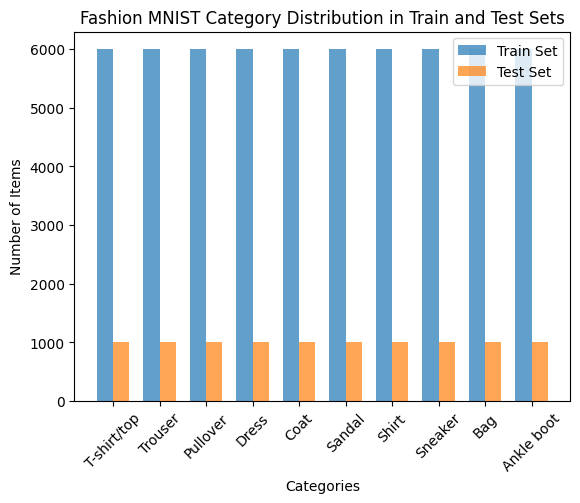


Additional Information:
-----------------------
Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the bar graph
def plot_category_distribution(train_labels, test_labels, category_labels):
    categories = list(category_labels.values())
    num_categories = len(categories)
    labels = list(category_labels.keys())

    # Count the number of items in each category for both train and test sets
    train_counts = [sum(train_labels == label) for label in labels]
    test_counts = [sum(test_labels == label) for label in labels]

    bar_width = 0.35
    index = np.arange(num_categories)

    # Plotting the bar graph
    plt.bar(index, train_counts, bar_width, label='Train Set', alpha=0.7)
    plt.bar(index + bar_width, test_counts, bar_width, label='Test Set', alpha=0.7)

    plt.xlabel('Categories')
    plt.ylabel('Number of Items')
    plt.title('Fashion MNIST Category Distribution in Train and Test Sets')
    plt.xticks(index + bar_width / 2, categories, rotation=45)
    plt.legend()

    plt.show()

# Plot the category distribution
plot_category_distribution(train_labels, test_labels, category_labels)

# Additional information about the dataset
print("\nAdditional Information:")
print("-----------------------")
print(f"Shape of training images: {train_images.shape}")
print(f"Shape of testing images: {test_images.shape}")


the dataset is without bias. מאוזן

display in one row, small images of 10 random images from the dataset.


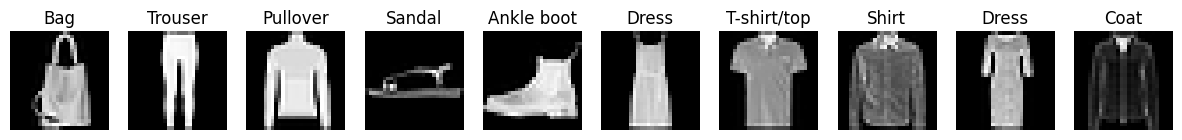

In [4]:
# Function to display random images in one row
def display_random_images(images, labels, category_labels, num_images=10):
    plt.figure(figsize=(15, 1.5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        index = np.random.randint(0, len(images))
        plt.imshow(images[index], cmap='gray')
        plt.title(category_labels[labels[index]])
        plt.axis('off')
    plt.show()

# Display 10 random images from the training set
display_random_images(train_images, train_labels, category_labels, num_images=10)


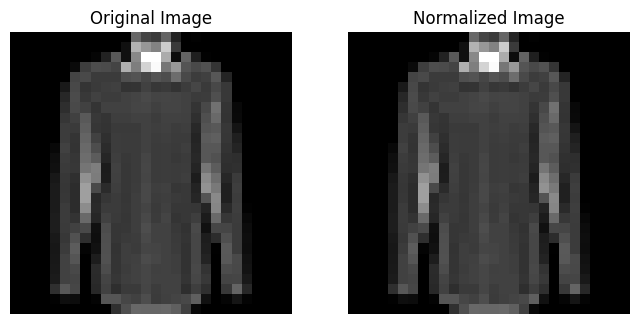

In [7]:
# Flatten each image
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Linear normalization
train_images_normalized = train_images_flatten / 255.0
test_images_normalized = test_images_flatten / 255.0


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Flatten and normalize the data
train_images_flatten = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_flatten = test_images.reshape(test_images.shape[0], -1) / 255.0

# Define the neural network model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(train_images_flatten.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define fit function
def fit_model():
    history = model.fit(train_images_flatten, train_labels,
                        epochs=10, batch_size=60,
                        validation_data=(test_images_flatten, test_labels))
    return history

# Train the model
training_history = fit_model()


Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 0.5644 - accuracy: 0.8013 - val_loss: 0.4921 - val_accuracy: 0.8232
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4081 - accuracy: 0.8545 - val_loss: 0.4337 - val_accuracy: 0.8483
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3704 - accuracy: 0.8680 - val_loss: 0.3853 - val_accuracy: 0.8642
Epoch 4/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3471 - accuracy: 0.8742 - val_loss: 0.3845 - val_accuracy: 0.8642
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.3260 - accuracy: 0.8814 - val_loss: 0.3924 - val_accuracy: 0.8617
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3120 - accuracy: 0.8851 - val_loss: 0.3564 - val_accuracy: 0.8744
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2993 - accuracy: 0.8916 - val_loss: 0.3671 - val_accuracy:

note:
the dataset is reliable, batch can be smaller



1/1 [==============================] - 0s 145ms/step
Original Label: Sneaker
Chosen Label: Sneaker


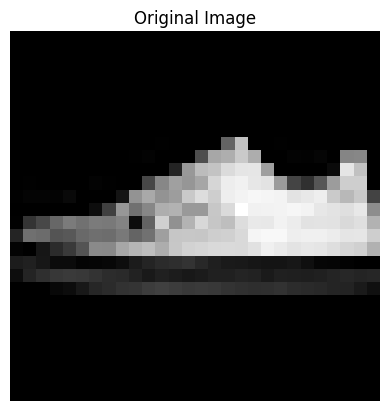


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0000
Shirt: 0.0000
Sneaker: 1.0000
Bag: 0.0000
Ankle boot: 0.0000


1/1 [==============================] - 0s 33ms/step
Original Label: Sandal
Chosen Label: Sandal


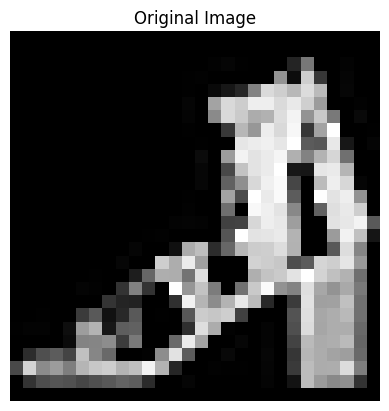


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.9948
Shirt: 0.0000
Sneaker: 0.0012
Bag: 0.0000
Ankle boot: 0.0040


1/1 [==============================] - 0s 32ms/step
Original Label: Sneaker
Chosen Label: Sneaker


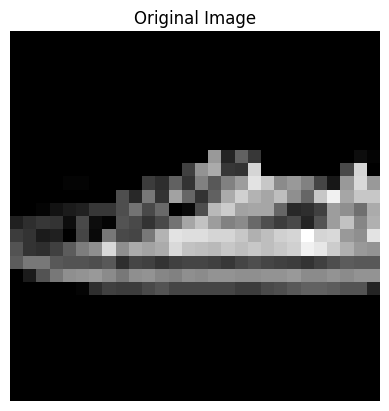


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0002
Shirt: 0.0000
Sneaker: 0.9996
Bag: 0.0001
Ankle boot: 0.0000


1/1 [==============================] - 0s 34ms/step
Original Label: T-shirt/top
Chosen Label: Shirt


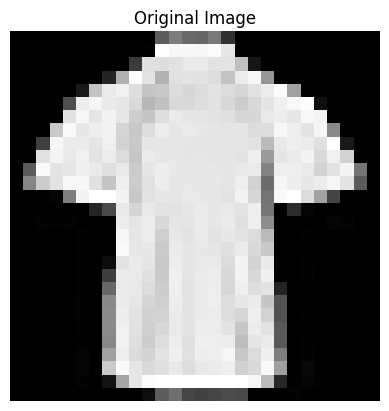


Output Labels with Probabilities:
T-shirt/top: 0.3118
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0000
Shirt: 0.6882
Sneaker: 0.0000
Bag: 0.0000
Ankle boot: 0.0000


1/1 [==============================] - 0s 28ms/step
Original Label: Shirt
Chosen Label: Shirt


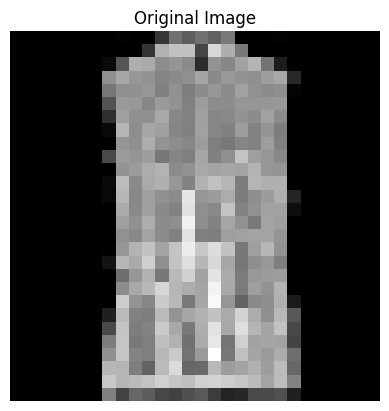


Output Labels with Probabilities:
T-shirt/top: 0.1265
Trouser: 0.0002
Pullover: 0.0014
Dress: 0.0178
Coat: 0.0022
Sandal: 0.0000
Shirt: 0.8518
Sneaker: 0.0000
Bag: 0.0002
Ankle boot: 0.0000


1/1 [==============================] - 0s 27ms/step
Original Label: Coat
Chosen Label: Coat


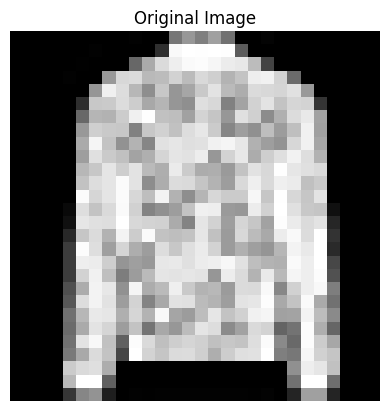


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 0.0000
Pullover: 0.0028
Dress: 0.0000
Coat: 0.9066
Sandal: 0.0000
Shirt: 0.0905
Sneaker: 0.0000
Bag: 0.0000
Ankle boot: 0.0000


1/1 [==============================] - 0s 30ms/step
Original Label: Bag
Chosen Label: Bag


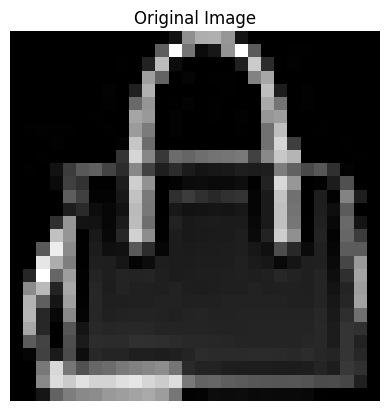


Output Labels with Probabilities:
T-shirt/top: 0.0653
Trouser: 0.0173
Pullover: 0.0165
Dress: 0.0004
Coat: 0.0009
Sandal: 0.0018
Shirt: 0.0057
Sneaker: 0.0310
Bag: 0.8382
Ankle boot: 0.0231


1/1 [==============================] - 0s 34ms/step
Original Label: Trouser
Chosen Label: Trouser


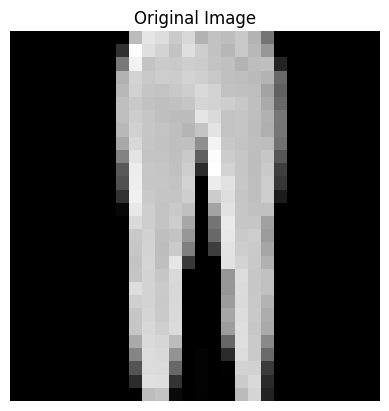


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 1.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0000
Shirt: 0.0000
Sneaker: 0.0000
Bag: 0.0000
Ankle boot: 0.0000


1/1 [==============================] - 0s 32ms/step
Original Label: Coat
Chosen Label: Shirt


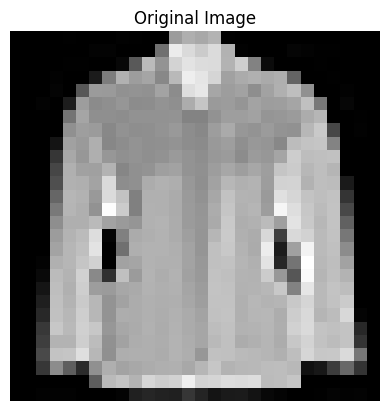


Output Labels with Probabilities:
T-shirt/top: 0.0010
Trouser: 0.0000
Pullover: 0.0006
Dress: 0.0000
Coat: 0.0741
Sandal: 0.0000
Shirt: 0.9243
Sneaker: 0.0000
Bag: 0.0000
Ankle boot: 0.0000


1/1 [==============================] - 0s 29ms/step
Original Label: Bag
Chosen Label: Bag


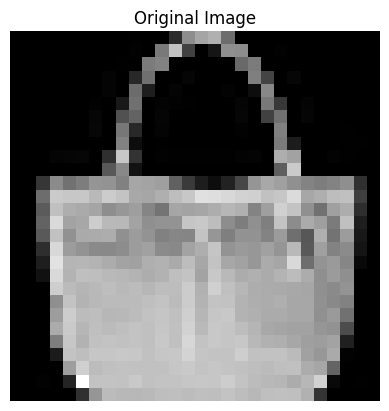


Output Labels with Probabilities:
T-shirt/top: 0.0000
Trouser: 0.0000
Pullover: 0.0000
Dress: 0.0000
Coat: 0.0000
Sandal: 0.0000
Shirt: 0.0000
Sneaker: 0.0000
Bag: 1.0000
Ankle boot: 0.0000




In [17]:
import numpy as np

# Function to perform forward pass and display results for 10 random images
def test_nn(model, test_images, test_labels, category_labels):
    num_images_to_test = 10
    random_indices = np.random.choice(len(test_images), num_images_to_test, replace=False)

    for index in random_indices:
        # Select a random test image
        test_image = test_images[index]
        original_label = test_labels[index]

        # Flatten and normalize the test image
        test_image_flatten = test_image.reshape(1, -1) / 255.0

        # Perform forward pass to get predictions
        predictions = model.predict(test_image_flatten)
        chosen_label = np.argmax(predictions)

        # Display results
        print(f"Original Label: {category_labels[original_label]}")
        print(f"Chosen Label: {category_labels[chosen_label]}")

        # Display the original image
        plt.imshow(test_image, cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        plt.show()

        # Display output labels with probabilities
        print("\nOutput Labels with Probabilities:")
        for label, probability in enumerate(predictions.flatten()):
            print(f"{category_labels[label]}: {probability:.4f}")

        print("\n" + "="*40 + "\n")

# Test the trained neural network
test_nn(model, test_images, test_labels, category_labels)
